# Machine Learning for Textual Data - The Bible
<b> Advanced Numberical Methods and Data Analysis - University of St. Gallen (HSG) - Spring semester 2019 </b>

Elisa Fleissner       (14-350-608)

Lars Stauffenegger    (tbd)

Alexander Steeb       (tbd)

07.05.2019

--------------------------------------------------------------------------------------------

# Project plan

**TODO:**

In this project we analyse the bible text using machine learning for textual data. From this analysis we expect to see different relevant topics and contexts between the books of the bible.

In a first step, we need to setup helpers function and import all relevant libraries used for this project.
Then we are importing the data and assigning the correct names of the books to the texts as well as the testament (old or new). 
We then have to process the data to make it suitable for the machine learning algorithm. We achieve this by [...].
...

Etc.

Two models: Word count/frequency (LDA) and word2vec


In [2]:
import sys
print(sys.executable)
print(sys.version)

/usr/local/opt/python/bin/python3.7
3.7.2 (default, Feb 12 2019, 08:15:36) 
[Clang 10.0.0 (clang-1000.11.45.5)]


## 0. Setup

In [5]:
# import functions
import json
import os
import shutil

import requests, zipfile, io

import pandas as pd

import re


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob, Word

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import word2vec

In [6]:
# Option to display whole text and not only first few words
pd.set_option('display.max_colwidth', 1)

Important to install textblob correctly and to download the corpora

Source: https://textblob.readthedocs.io/en/dev/

pip install -U textblob
python -m textblob.download_corpora

In [7]:
#nltk.download('stopwords')

In [8]:
# Helper functions

# based on: https://stackoverflow.com/questions/303200/how-do-i-remove-delete-a-folder-that-is-not-empty-with-python
def remove_folder(path):
    # check if folder exists
    if os.path.exists(path):
         # remove if exists
         shutil.rmtree(path)
    else:
         # throw your exception to handle this special scenario
         print('Folder does not exist')


def full_text(texts):
    full_text = ''
    for text in texts:
        full_text += text
    return(full_text)

In [9]:
custom_stopwords = stopwords.words('english')

custom_stopwords.append(["nephi","alma","mormoni","ether"])

## 1. Data import

**TODO:**

Überlegen, ob wir noch einen zweiten text anschauen wollen und wenn ja suchen, wo es diesen online gibt

Code sollte soweit passen, kann nur vielleicht noch kommentiert werden

Source:
https://sites.google.com/site/ruwach/bibletext

In [10]:
remove_folder("data")

In [11]:
old_zip_file_url = "https://sites.google.com/site/ruwach/Basic_English_OldTestament.zip?attredirects=0"

#old_zip_file_url = "http://ruwach.googlepages.com/OldTestament.zip"

new_zip_file_url = "https://sites.google.com/site/ruwach/Basic_English_NewTestament.zip?attredirects=0"
#new_zip_file_url = "http://ruwach.googlepages.com/NewTestament.zip"
    
def unzip(url):
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("data/")
    
unzip(old_zip_file_url)
unzip(new_zip_file_url)

In [12]:
path = "data"
df = pd.DataFrame()  


testaments = os.listdir(path)

for testament in testaments:
    testament_path = os.path.join(path,testament)
    books = os.listdir(testament_path)
    print(testament) #do we need this?
    
    for book in books:
        book_path = os.path.join(testament_path,book)
        files = os.listdir(book_path)    
            
        for file in files:
            file_path = os.path.join(book_path,file) 
            
            with open(file_path,"r", encoding="utf-8") as infile:
                text = infile.read()
                df = df.append([[text, testament, book, file, file_path]], ignore_index=True)
                
df.columns = ["text", "testament", "book", "file", "path"]

Old Testament
New Testament


In [13]:
books = (
    "Genesis",
    "Exodus",
    "Leviticus",
    "Numbers",
    "Deuteronomy",
    "Joshua",
    "Judges",
    "Ruth",
    "1 Samuel",
    "2 Samuel",
    "1 Kings",
    "2 Kings",
    "1 Chronicles",
    "2 Chronicles",
    "Ezra",
    "Nehemiah",
    "Esther",
    "Job",
    "Psalms",
    "Proverbs",
    "Ecclesiastes",
    "Song of Solomon",
    "Isaiah",
    "Jeremiah",
    "Lamentations",
    "Ezekiel",
    "Daniel",
    "Hosea",
    "Joel",
    "Amos",
    "Obadiah",
    "Jonah",
    "Micah",
    "Nahum",
    "Habbakuk",
    "Zephaniah",
    "Haggai",
    "Zechariah",
    "Malachi",
    "Matthew",
    "Mark",
    "Luke",
    "John",
    "Acts",
    "Romans",
    "1 Corinthians",
    "2 Corinthians",
    "Galatians",
    "Ephesians",
    "Philippians",
    "Colossians",
    "1 Thessalonians",
    "2 Thessalonians",
    "1 Timothy",
    "2 Timothy",
    "Titus",
    "Philemon",
    "Hebrews",
    "James",
    "1-2 Peter",
    "1-3 John",
    "Jude",
    "Revalation")

In [14]:
books_order = pd.DataFrame.from_records(zip(books, range(1,len(books))))

books_order.columns = ["book", "order"]

df = pd.merge(df,books_order, on='book')

In [15]:
def get_num(text):
    return(int(''.join([n for n in text if n.isdigit()])))

df['file'] = df['file'].apply(get_num)

In [16]:
df = df.sort_values(["order","file"], ascending=[True,True])
df.reset_index(drop=True, inplace=True)

## 2. Data cleaning

**TODO**

Aktuell ist der code zu Teilen noch 1:1 aus dem Beispiel. Muss noch geändert werden bzw das Beispiel als Qulle / Inspiration angegeben werden


**TODO**

In this section we will prepare the data to be analysed. We therefore need to apply different techniques to clean the data so that machine learning algorithms can analyse the data set. For a first inspection of the data, we will use a wordcloud and word count analysis.

https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34 gives a good summary over the data pre-processing step, i.e. tokenizations and word stemming / lemmatization. 
Steps: 
1. Remove Blank rows in Data, if any
2. Change all the text to lower case
3. Word Tokenization
4. Remove Stop words
5. Remove Non-alpha text
6. Word Lemmatization (rather than stemming)


Data cleaning: Stemming, tokenization, see other documentation
Data visualisation (eg wordcloud)
Data inspection

In [23]:
def preprocessor(t):
    '''Prepare text from TextBlob'''
#   Regex to remove roman numerals / source: https://stackoverflow.com/questions/267399/how-do-you-match-only-valid-roman-numerals-with-a-regular-expression
    t = re.sub(r'(?=\b[MCDXLVI]{1,6}\b)M{0,4}(?:CM|CD|D?C{0,3})(?:XC|XL|L?X{0,3})(?:IX|IV|V?I{0,3})', ' ', t)
    t = t.lower() 
    t = t.replace('\n', ' ') #Replace newline with space
    
    t = re.sub('[^a-zA-Z]',' ',t)

    return t.strip()


# inspired by https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
def lemmatizer(text):
    text = TextBlob(text)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}

    result = ' '
    
    for sentence in text.sentences:
        words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sentence.tags]
        lemmatized_list = [w.lemmatize(tag) for w, tag in words_and_tags]
        
        sentence_new = ' '.join(lemmatized_list)
        
        result = result + sentence_new
    
    return(str(result))

def remove_stopwords(text):
    text = TextBlob(text)

    text = (token for token in text.tokens if token not in custom_stopwords)
    stopremoved = ' '.join(text)
    return(str(stopremoved))


def wordcloud_map(text_corp):
    full_text = ''
    for text in text_corp:
        full_text += text    
        
    wordcloud = WordCloud(max_font_size = 40,background_color = "white").generate(full_text)

    plt.figure(figsize = (10,10))
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.show()

In [24]:
%%time
df['clean'] = df['text']
df['clean'] = df['clean'].apply(preprocessor)
df['clean'] = df['clean'].apply(lemmatizer)

CPU times: user 41.7 s, sys: 489 ms, total: 42.2 s
Wall time: 42.3 s


In [25]:
%%time
df['clean_rm'] = df['clean'].apply(remove_stopwords)

CPU times: user 4.21 s, sys: 19.5 ms, total: 4.23 s
Wall time: 4.25 s


### Wordcloud

Available for old and new testament separated and the entire bible.

**TODO**

Kann eventuell auch noch etwas eleganter und hübscher gemacht werden

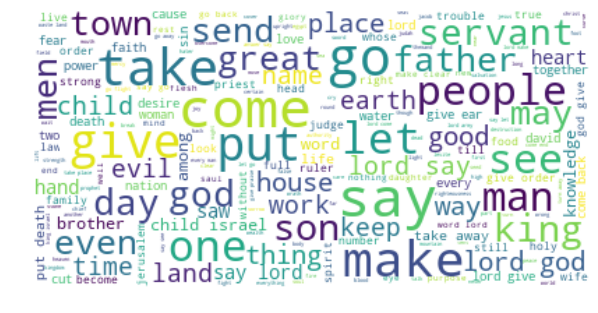

In [26]:
wordcloud_map(df['clean_rm'])

Old Testament


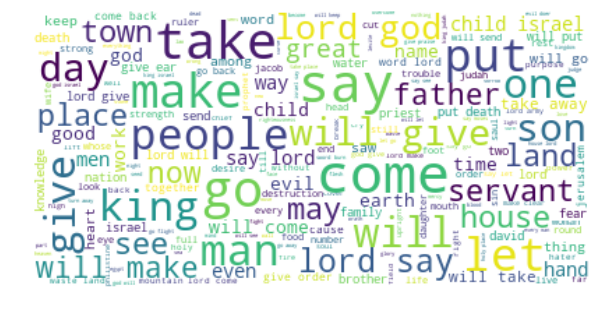

In [27]:
# Old testament only
i = 0
print(testaments[i])

data = df.loc[df.testament == testaments[i],'clean']
wordcloud_map(data)

New Testament


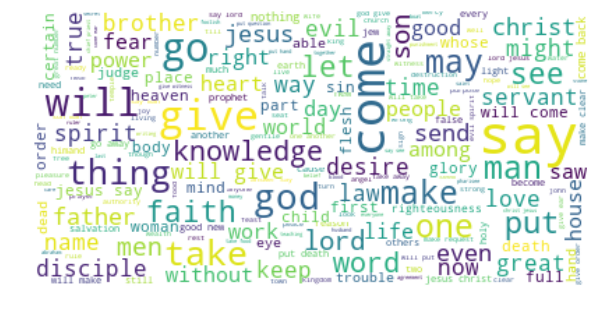

In [28]:
# New testament only
i = 1
print(testaments[i])

data = df.loc[df.testament == testaments[i],'clean']
wordcloud_map(data)

## Simple analysis

**TODO**

- Wieviele Wörter sind es insgesamt etc.
- Welche Wörter kommen am häufigsten vor im alten/ neune Testament etc.
--> Etwas stimmt nicht mit dem wordcount, weil nur einzelne buchstaben gezält werden...
- Plotten wo welche Wörter im Verlauf des gesamten Textes vorkommen

In [17]:
# Obtain text per book
text = df['clean']

# Use the sklearn vectorizer
tf = TfidfVectorizer(min_df = 2,
                     analyzer = 'word',
                     ngram_range = (1,1))

txt_fitted = tf.fit(text)
txt_transformed = txt_fitted.transform(text)

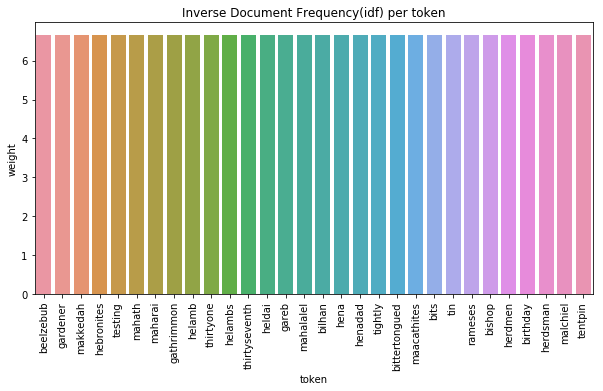

In [18]:
idf = tf.idf_
rr = dict(zip(txt_fitted.get_feature_names(), idf))

token_weight = pd.DataFrame.from_dict(rr, orient = 'index').reset_index()
token_weight.columns = ('token','weight')
token_weight = token_weight.sort_values(by = 'weight', ascending = False)
token_weight = token_weight[0:30]

sns.barplot(x = 'token', y = 'weight', data = token_weight)            
plt.title("Inverse Document Frequency(idf) per token")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xticks(rotation = 90)
plt.show()

In [19]:
count = pd.DataFrame.from_dict(tf.vocabulary_, orient = "index", columns = ["TF"])
count.sort_values(by = "TF")

,TF
aaron,0
abarim,1
abba,2
abdi,3
abdon,4
abednego,5
abel,6
abelmeholah,7
abiathar,8
abib,9


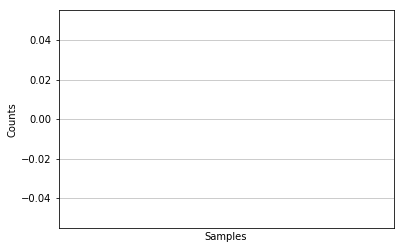

In [20]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

count = df.loc[df.testament == "OldTestament",'text'].apply(preprocessor)
count = count.apply(remove_stopwords)

full_text = ''
for text in count:
    full_text += text

fdist = FreqDist(full_text)
fdist.plot(30, cumulative=False)
plt.show()


## 3. Model 1 - LDA

**TODO**

- Description of what is going on
Latent Dirichlet Allocation (LDA) is a method to identify topics within a text corpus.
We will use this method for a preliminary analysis on our bible texts to see whether the topics discussed in the books have been changing over time.
We got inspiration for this code from Knoepfl, Rieger & Sommer (2018).
- **Code abändern und kommentieren, damit er nicht 1:1 wie das beispiel ist**
- Können wir das preprocessing noch verbessern? (Die top wörter der topics enthalten teilweise noch Füllwörter)
- Können wir die Top Wörter der einzelnen Topics als Wordclouds darstellen? (Das könnte glaub ein cooles extra sein)
- Können wir unsere Daten noch mit irgendwas anreichern?

In [148]:
# Options:
n_components = 4

In [149]:
text = df['clean_rm']

In [150]:
count = CountVectorizer(
            min_df = 2,
            max_df = 0.90,
            ngram_range = (1,3)
            )

txt_count = count.fit_transform(text)  #sparse matrix
txt_count

<1136x68985 sparse matrix of type '<class 'numpy.int64'>'
	with 411686 stored elements in Compressed Sparse Row format>

In [151]:
# Fit LDA model
lda = LatentDirichletAllocation(
    n_components = n_components, 
    random_state = 123, 
    learning_method = 'batch',
    max_iter = 50,
    verbose = True,
    evaluate_every = True)

X_topics = lda.fit_transform(txt_count)

lda.components_.shape

iteration: 1 of max_iter: 50, perplexity: 14490.9375
iteration: 2 of max_iter: 50, perplexity: 11734.1684
iteration: 3 of max_iter: 50, perplexity: 11206.8522
iteration: 4 of max_iter: 50, perplexity: 10963.2879
iteration: 5 of max_iter: 50, perplexity: 10824.6710
iteration: 6 of max_iter: 50, perplexity: 10731.0852
iteration: 7 of max_iter: 50, perplexity: 10664.7874
iteration: 8 of max_iter: 50, perplexity: 10615.0139
iteration: 9 of max_iter: 50, perplexity: 10574.6978
iteration: 10 of max_iter: 50, perplexity: 10541.0997
iteration: 11 of max_iter: 50, perplexity: 10512.0495
iteration: 12 of max_iter: 50, perplexity: 10486.7862
iteration: 13 of max_iter: 50, perplexity: 10463.8280
iteration: 14 of max_iter: 50, perplexity: 10443.3311
iteration: 15 of max_iter: 50, perplexity: 10424.5200
iteration: 16 of max_iter: 50, perplexity: 10407.7301
iteration: 17 of max_iter: 50, perplexity: 10393.4451
iteration: 18 of max_iter: 50, perplexity: 10380.6522
iteration: 19 of max_iter: 50, perple

(4, 68985)

In [152]:
# Print most important words of every topic
print("The ten most important words of four topics are:")
print()
n_top_words = 5
feature_names = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i]
    for i in topic.argsort()\
        [:-n_top_words - 1:-1]]))    
    print()
print()

The ten most important words of four topics are:

Topic 1:
say go man god put

Topic 2:
lord say go god put

Topic 3:
offering put lord one holy

Topic 4:
say go son king lord




In [153]:

X_topics = pd.DataFrame(X_topics)

X_topics['order'] = df['order']

X_topics_mean = X_topics.groupby(df['book']).mean()

X_topics_mean = X_topics_mean.sort_values('order', )
df.reset_index(drop=True, inplace=True)

X_topics_mean =X_topics_mean.iloc[:,0:n_components]

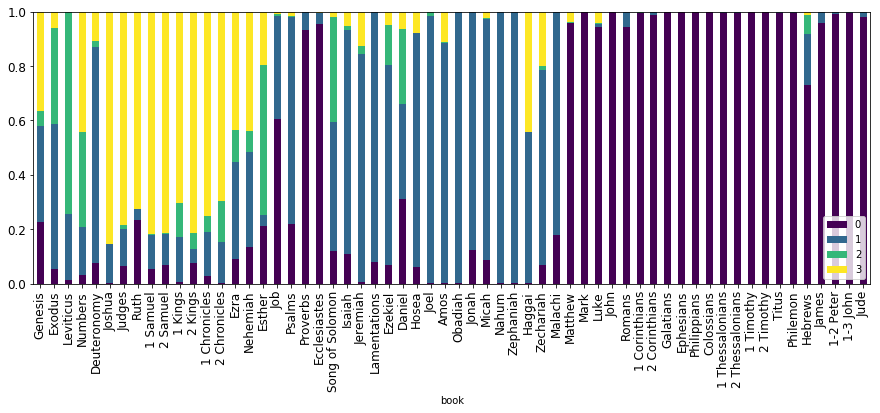

In [154]:
X_topics_mean.plot(kind='bar',
                   stacked=True,
                   rot='vertical',
                   ylim=(0,1),
                   figsize=(15, 5), 
                   legend=True, 
                   fontsize=12,
                   colormap = "viridis"
                  )

## 4. Model 2 - Word2vec

**TODO**

- Mehr insights erstellen (siehe link)
The word2vec method allows to reconstruct linguistic features of the corpus analysed and embedds the words in their context using a shallow two-layer network. This method allows to evaluate the associations to a certain word and thus allows to capture the sentiment of the text.

- z.B. was wird mit Gott im alten vs neune Testament verbunden etc. / Gott steht zu Jesus im Verhältnis wie ....
- Visualization of results

Source:
https://nbviewer.jupyter.org/github/danielfrg/word2vec/blob/master/examples/word2vec.ipynb

In [35]:
remove_folder("model")
os.mkdir("model")

In [47]:
with open("model/text_full.txt", "w") as text_file:
    text_file.write(full_text(df.loc[:,'clean']))
    
with open("model/text_old.txt", "w") as text_file:
    text_file.write(full_text(df.loc[df['testament'] == testaments[0],'clean']))

with open("model/text_new.txt", "w") as text_file:
    text_file.write(full_text(df.loc[df['testament'] == testaments[1],'clean']))

In [53]:
def estimate_word2vec(file):
    word2vec.word2phrase(train = file, 
                     output="model/text-phrases", 
                     min_count=1,
                     verbose=True)
    word2vec.word2vec("model/text-phrases", "model/text.bin", 
                  size=100, 
                  min_count=2,
#                  sample=1e-5, # Downsample high frequenzy words
                  verbose=True)
    return(word2vec.load('model/text.bin'))

In [54]:
## Predictions

In [55]:
print("Fit full model")
model_full = estimate_word2vec('model/text_full.txt')

print('\n')
print("Fit old testament model")
model_old = estimate_word2vec('model/text_old.txt')

print('\n')
print("Fit new testament model")
model_new = estimate_word2vec('model/text_new.txt')

Fit full model
Starting training using file model/text_full.txt
Words processed: 800K     Vocab size: 89K  
Vocab size (unigrams + bigrams): 91734
Words in train file: 824297
Starting training using file model/text-phrases
Vocab size: 5046
Words in train file: 806143
Alpha: 0.000002  Progress: 101.02%  Words/thread/sec: 473.40k  read/sec: 448.34k  Progress: 28.03%  Words/thread/sec: 469.15k  9.23k  29%  Words/thread/sec: 469.77k  rds/thread/sec: 470.09k  : 0.003881  Progress: 84.74%  Words/thread/sec: 471.33k  

Fit old testament model
Starting training using file model/text_old.txt
Words processed: 600K     Vocab size: 76K  
Vocab size (unigrams + bigrams): 80112
Words in train file: 657233
Starting training using file model/text-phrases
Vocab size: 4648
Words in train file: 642158
Alpha: 0.000002  Progress: 101.12%  Words/thread/sec: 474.96k   0.017970  Progress: 28.44%  Words/thread/sec: 458.90k  ogress: 44.14%  Words/thread/sec: 461.94k  09k  25k  

Fit new testament model
Starting

In [57]:
indexes, metrics = model_full.similar("lord")
model1 = model_old.generate_response(indexes, metrics).tolist()
model1

[('son', 0.7646931460543951),
 ('young', 0.577386500057911),
 ('voice', 0.5469055955696557),
 ('fear', 0.5439472262844661),
 ('wrong', 0.5318200896643883),
 ('light', 0.5273618444796145),
 ('joseph', 0.5262870487943542),
 ('end', 0.5149561997657341),
 ('west', 0.5116459171869976),
 ('let', 0.503494485917065)]

In [ ]:
df = pd.DataFrame(model1)
xpos = np.arange(len(df))
performance = df.loc[:, 1]

plt.bar(xpos, performance, align='center')
plt.ylabel('Proximity')
plt.title('Token')
plt.xticks(xpos, df.loc[:, 0])
plt.xticks(rotation=90)
plt.show()

In [60]:
indexes, metrics = model.similar("jesus")
model.generate_response(indexes, metrics).tolist()

[('peter', 0.80274187506989),
 ('jesus_answering', 0.7894885634612356),
 ('disciple', 0.7878173825054771),
 ('john', 0.74019280712405),
 ('pharisee', 0.7352138595643752),
 ('pilate', 0.7192773528323313),
 ('elijah', 0.7140480081844682),
 ('here', 0.704285986981928),
 ('dothan', 0.6948565681550396),
 ('nothing', 0.6836550141689864)]

In [64]:
# Analogies
# This allows to construct the king - man + women = queen analogy.

indexes, metrics = model.analogy(pos = ['lord', 'jesus'], neg = ['moses'])
model.generate_response(indexes, metrics).tolist()

[('peace', 0.2951837180721667),
 ('nothing', 0.2901640465369579),
 ('master', 0.2726898119792204),
 ('how', 0.2675078657284756),
 ('dream', 0.2627181425359525),
 ('desire', 0.262304241524011),
 ('still', 0.2589886559198299),
 ('he', 0.256025062528622),
 ('request', 0.254609850707936),
 ('well', 0.25282250355837715)]

In [73]:
# Clusters

clusters = word2vec.load_clusters('model/text_full.txt')
model_full.clusters = clusters
model_full.clusters.vocab

array('at', dtype='<U2')

## 4. Model 2 - LDA2vec

In [ ]:
lda2vec?

In [ ]:
model = lda2vec(n_words, max_length, n_hidden, counts)

In [ ]:
model.add_component(n_docs, n_topics, name='document id')
model.fit(clean, components=[doc_ids])
While visualizing the feature is similarly straightforward:

In [ ]:
topics = model.prepare_topics('document_id', vocab)
prepared = pyLDAvis.prepare(topics)
pyLDAvis.display(prepared)

## 5. Sentiment

In [276]:
df['sentiment'] = df.text.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

sentiment = df[['sentiment','order']].groupby(df['book']).mean()

sentiment = sentiment.sort_values('order', )
#df.reset_index(drop=True, inplace=True)

sentiment = sentiment.iloc[:,[0]]

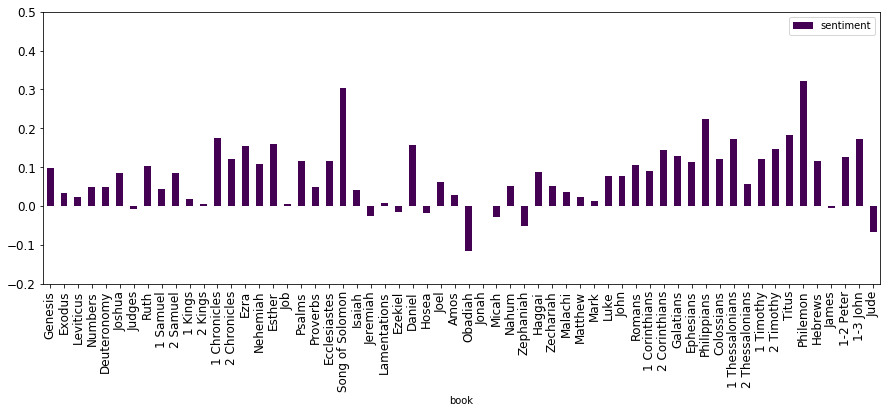

In [277]:
sentiment.plot(kind='bar',
                   rot='vertical',
                   ylim=(-0.2,0.5),
                   figsize=(15, 5), 
                   legend=True, 
                   fontsize=12,
                   colormap = "viridis"
                  )

# Import other books

In [161]:
path = "texts"
df_books = pd.DataFrame() 

books = os.listdir(path)
books

['Meditations.txt', 'Mormon.txt', 'Bible.txt', 'Koran.txt', 'Buddha.txt']

In [162]:
book_list = list()

for book in books:
    book_path = os.path.join(path,book)
    print(book_path)
    with open(book_path, "r", encoding="utf-8") as infile:
        raw_text = infile.read()
        book_list.append(raw_text)
        #df_books = df_books.append([[book, raw_text, book_path]], ignore_index=True)

texts/Meditations.txt
texts/Mormon.txt
texts/Bible.txt
texts/Koran.txt
texts/Buddha.txt


In [163]:
book_path = os.path.join(path,books[0])
print(book_path)

with open(book_path, "r", encoding="utf-8") as infile:
        raw_text = infile.read()
        meditations = TextBlob(raw_text)        

start = meditations.find("MARCUS AURELIUS ANTONINUS was born on April 26")
end = meditations.find("THIS being neither a critical edition of the text")
meditations = meditations[start:end]

meditations_clean = meditations.raw
meditations_clean = preprocessor(meditations_clean)
meditations_clean = lemmatizer(meditations_clean)
meditations_clean = remove_stopwords(meditations_clean)

texts/Meditations.txt


In [164]:
book_path = os.path.join(path,books[1])
print(book_path)

with open(book_path, "r", encoding="utf-8") as infile:
        raw_text = infile.read()
        mormon = TextBlob(raw_text)        

start = mormon.find("THE BOOK OF MORMON")
end = mormon.find("End of the Project Gutenberg EBook of The Book Of Mormon, by Anonymous")
mormon = mormon[start:end]

mormon_clean = mormon.raw
mormon_clean = preprocessor(mormon_clean)
mormon_clean = lemmatizer(mormon_clean)
mormon_clean = remove_stopwords(mormon_clean)

texts/Mormon.txt


In [165]:
book_path = os.path.join(path,books[3])
print(book_path)

with open(book_path, "r", encoding="utf-8") as infile:
        raw_text = infile.read()
        koran = TextBlob(raw_text)        

start = koran.find("SURA1 XCVI.-THICK BLOOD, OR CLOTS OF BLOOD [I.]")
end = koran.find("End of The Project Gutenberg Etext of The Koran")
koran = koran[start:end]

koran_clean = koran.raw
koran_clean = preprocessor(koran_clean)
koran_clean = lemmatizer(koran_clean)
koran_clean = remove_stopwords(koran_clean)

texts/Koran.txt


In [166]:
book_path = os.path.join(path,books[4])
print(book_path)

with open(book_path, "r", encoding="utf-8") as infile:
        raw_text = infile.read()
        buddha = TextBlob(raw_text)        

start = buddha.find("Rejoice at the glad tidings!")
end = buddha.find("TABLE OF REFERENCE.")
buddha = buddha[start:end]

buddha_clean = buddha.raw
buddha_clean = preprocessor(buddha_clean)
buddha_clean = lemmatizer(buddha_clean)
buddha_clean = remove_stopwords(buddha_clean)

texts/Buddha.txt


In [167]:
bible_clean = full_text(df['clean_rm'])

# LDA analysis

In [306]:
# Options:
n_components = 5

In [323]:
all_texts = pd.DataFrame([['Bible',bible_clean],
                    ['Meditations',meditations_clean],
                    ['Mormon',mormon_clean],
                    ['Koran',koran_clean],
                    ['Buddha',buddha_clean]])

all_texts.columns = ["book", "text"]

In [339]:
text = [text for text in all_texts['text']]

In [343]:
CountVectorizer?

In [359]:
count = CountVectorizer(
            min_df = 2,
            max_df = 0.95,
            ngram_range = (1,3)
            )

txt_count = count.fit_transform(text)
txt_count

<5x26246 sparse matrix of type '<class 'numpy.int64'>'
	with 59914 stored elements in Compressed Sparse Row format>

In [360]:
# Fit LDA model
lda = LatentDirichletAllocation(
    n_components = n_components, 
    random_state = 123, 
    learning_method = 'batch',
    max_iter = 50,
    verbose = False,
    evaluate_every = True)

X_topics = lda.fit_transform(text_count)

lda.components_.shape

iteration: 1 of max_iter: 50, perplexity: 2833.0459
iteration: 2 of max_iter: 50, perplexity: 2156.8601
iteration: 3 of max_iter: 50, perplexity: 2039.4523
iteration: 4 of max_iter: 50, perplexity: 1997.1280
iteration: 5 of max_iter: 50, perplexity: 1982.3342
iteration: 6 of max_iter: 50, perplexity: 1978.1149
iteration: 7 of max_iter: 50, perplexity: 1976.0041
iteration: 8 of max_iter: 50, perplexity: 1974.3435
iteration: 9 of max_iter: 50, perplexity: 1972.7497
iteration: 10 of max_iter: 50, perplexity: 1971.5203
iteration: 11 of max_iter: 50, perplexity: 1970.8847
iteration: 12 of max_iter: 50, perplexity: 1970.5257
iteration: 13 of max_iter: 50, perplexity: 1970.2402
iteration: 14 of max_iter: 50, perplexity: 1969.9961
iteration: 15 of max_iter: 50, perplexity: 1969.7941
iteration: 16 of max_iter: 50, perplexity: 1969.6115
iteration: 17 of max_iter: 50, perplexity: 1969.4091
iteration: 18 of max_iter: 50, perplexity: 1969.1489
iteration: 19 of max_iter: 50, perplexity: 1968.8303
it

(5, 24121)

In [361]:
# Print most important words of every topic
print("The ten most important words of four topics are:")
print()
n_top_words = 5
feature_names = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i]
    for i in topic.argsort()\
        [:-n_top_words - 1:-1]]))    
    print()
print()

The ten most important words of four topics are:

Topic 1:
thembut see righteousness could city shall unto god hath solid mass

Topic 2:
among wine lift men transgression become free fullthe

Topic 3:
get land righteousness could unto god hath profess gold good

Topic 4:
profess forth light landif life first city shall

Topic 5:
among wine lift men transgression become free fullthe




In [362]:
X_topics = pd.DataFrame(X_topics)
X_topics.index = all_texts['book']

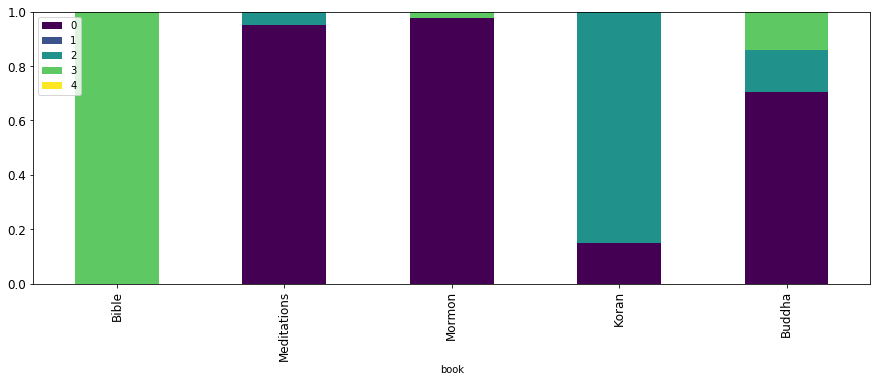

In [363]:
X_topics.plot(kind='bar',
                   stacked=True,
                   rot='vertical',
                   ylim=(0,1),
                   figsize=(15, 5), 
                   legend=True, 
                   fontsize=12,
                   colormap = "viridis"
                  )

# Sentiment

In [289]:
all_texts['sentiment'] = all_texts.text.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

sentiment = all_texts[['book','sentiment']].groupby(['book']).mean()

<Figure size 432x288 with 0 Axes>

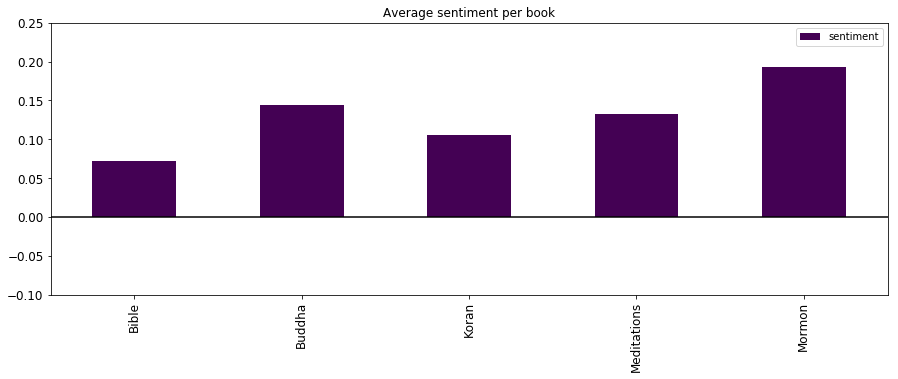

In [303]:
plt.figure();

ax = sentiment.plot(kind='bar',
                   rot='vertical',
                    title = "Average sentiment per book",
                   ylim=(-0.1,0.25),
                   figsize=(15, 5), 
                   legend=True, 
                   fontsize=12,
                   colormap = "viridis"
                  )

ax.set_xlabel("")

plt.axhline(0, color='k')